In [13]:
import pandas as pd
from Config import user, password
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session

In [14]:
# Create engine
host = "localhost"
port = "5432"
db = "Employee Database"
uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}"
uri
engine = create_engine(uri)

# Create a connection
connection = engine.connect()

# Declare a Base
Base = automap_base()

# Use the Base class to create an ORM to reflect the database tables
Base.prepare(engine, reflect=True)

# Use Inspector to print the column names and types
inspector = inspect(engine)

# Start a session to query the database
session = Session(engine)

In [15]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['Employees', 'Dept_Emp', 'Departments', 'Dept_Manager', 'Salaries', 'Titles']

In [16]:
# Assign classes to variables
# Dow = Base.classes.dow
Employees = Base.classes.Employees
Dept_Emp = Base.classes.Dept_Emp
Departments = Base.classes.Departments
Dept_Manager = Base.classes.Dept_Manager
Salaries = Base.classes.Salaries
Titles = Base.classes.Titles

In [17]:
columns_sal = inspector.get_columns('Employees')
for column in columns_sal:
    print(column["name"], column["type"])

emp_no INTEGER
birth_date DATE
first_name VARCHAR
last_name VARCHAR
gender VARCHAR
hire_date DATE


In [18]:
columns_sal = inspector.get_columns('Salaries')
for column in columns_sal:
    print(column["name"], column["type"])

salaries_id INTEGER
emp_no INTEGER
salary INTEGER
from_date DATE
to_date DATE


In [19]:
columns_ti = inspector.get_columns('Titles')
for column in columns_ti:
    print(column["name"], column["type"])

titles_id INTEGER
emp_no INTEGER
title VARCHAR
from_date DATE
to_date DATE


In [25]:
# Create a bar chart of average salary by title.

# SELECT t.title, CAST (AVG(s.salary)AS DEC(10))
# FROM "Titles" as t 
# 	JOIN "Salaries" as s
# 	ON (t.emp_no = s.emp_no)
# GROUP BY t.title

sql = """
SELECT t.title, CAST (AVG(s.salary)AS DEC(10)) 
FROM "Titles" as t 
JOIN "Salaries" as s 
ON (t.emp_no = s.emp_no) 
GROUP BY t.title;
"""
df = pd.read_sql(sql, engine)
df.head()


,title,avg
0,Assistant Engineer,48493.0
1,Engineer,48540.0
2,Manager,51531.0
3,Senior Engineer,48507.0
4,Senior Staff,58503.0


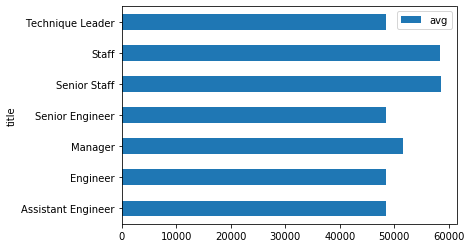

In [30]:
df.plot.barh(x='title', y='avg')

In [22]:
# Search your ID number: 499942
for row in session.query(Employees).filter_by(emp_no=499942):
    print (row.first_name, row.last_name)


April Foolsday
